In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

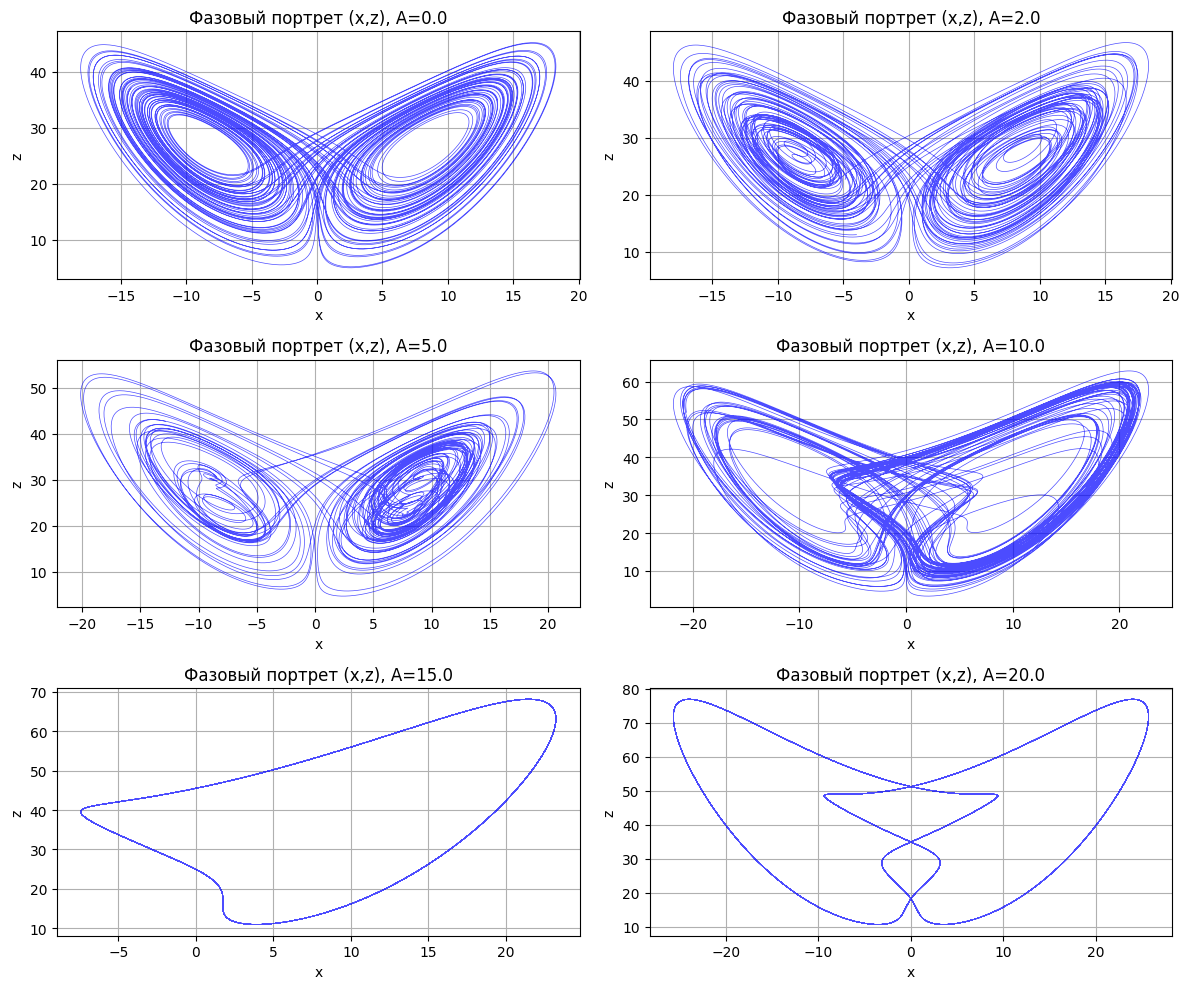

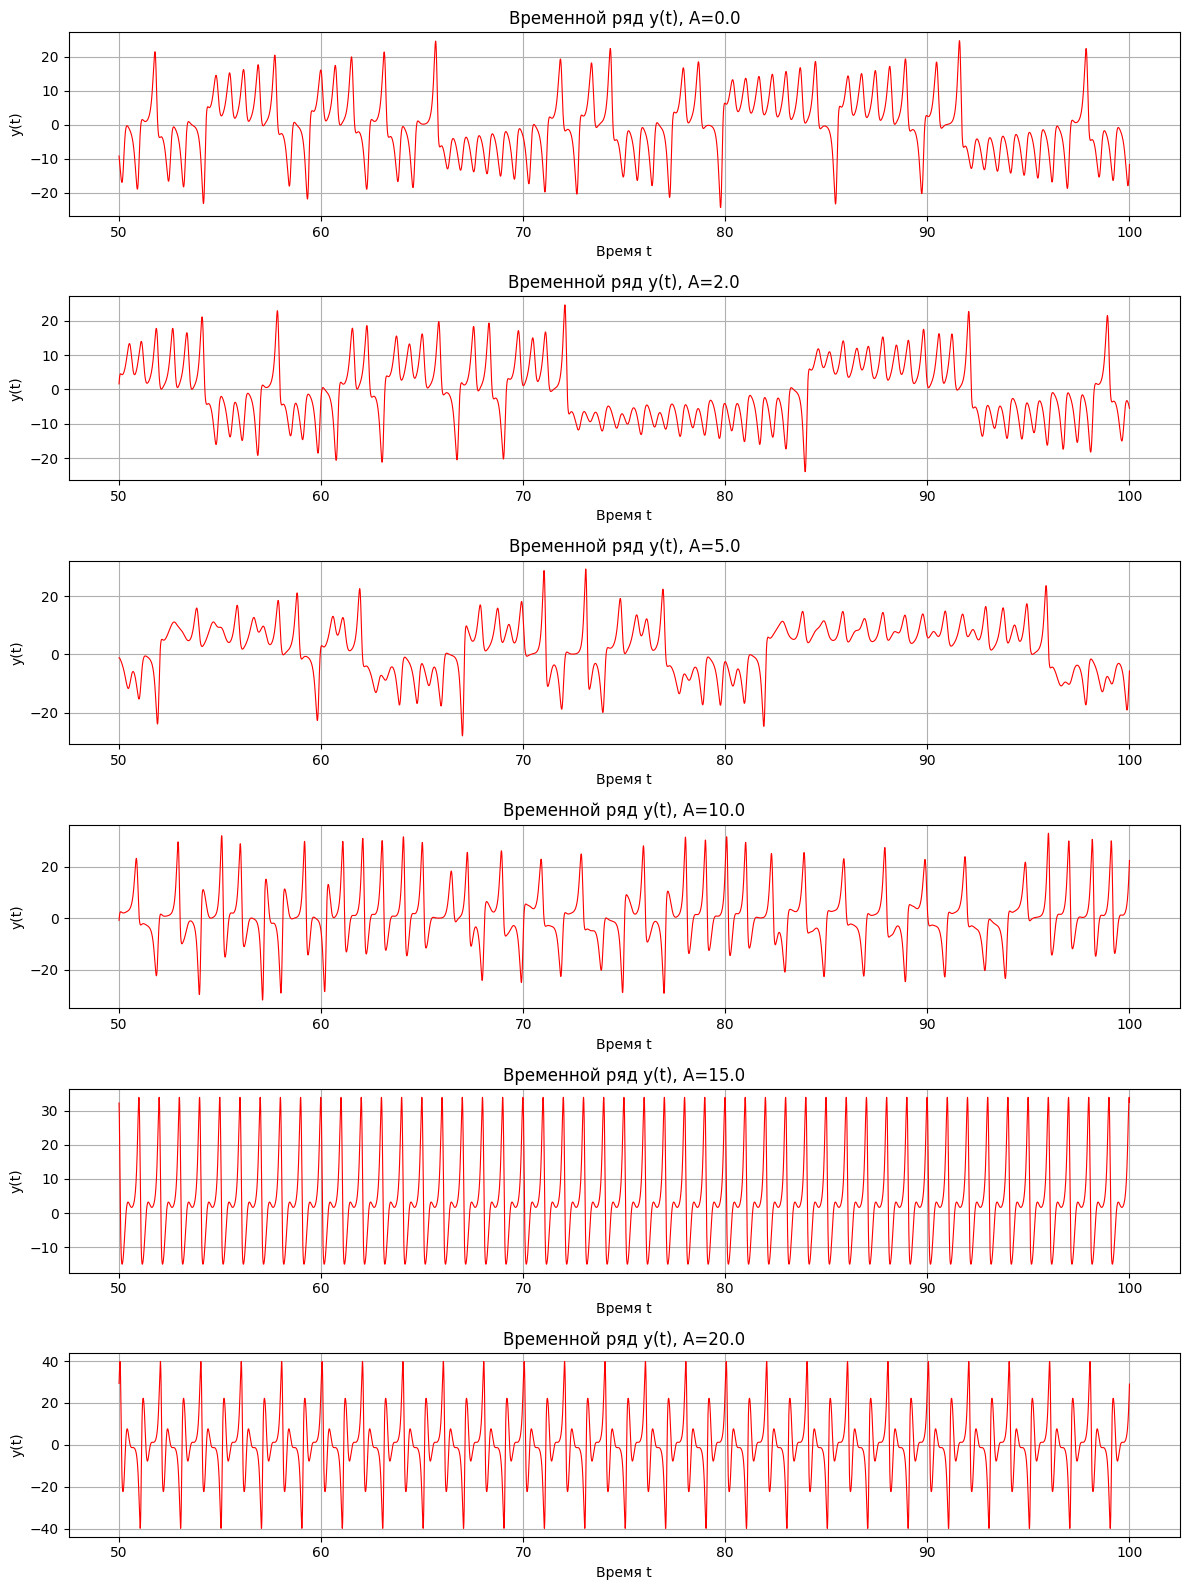

In [10]:
# Параметры системы
sigma = 10.0
r0 = 28.0
b = 8.0 / 3.0
omega = 2.0 * np.pi  # период T ≈ 1 (ω = 2π/T, T=1)

# Список амплитуд для исследования
A_list = [0.0, 2.0, 5.0, 10.0, 15.0, 20.0]

# Начальные условия (близко к аттрактору Лоренца)
x0, y0, z0 = 1.0, 1.0, 1.0

# Временной интервал: от 0 до 100 (достаточно для установления на аттрактор)
t_span = (0.0, 100.0)
# Частота вывода данных для графиков
t_eval = np.linspace(0.0, 100.0, 50000)


# Функция, задающая систему
def lorenz_forced(t, state, sigma, r0, b, A, omega):
    x, y, z = state
    dxdt = -sigma * x + sigma * y
    dydt = (r0 + A * np.cos(omega * t)) * x - y - x * z
    dzdt = x * y - b * z
    return [dxdt, dydt, dzdt]


# Создание фигур для графиков
fig_phase, axs_phase = plt.subplots(3, 2, figsize=(12, 10))
fig_time, axs_time = plt.subplots(6, 1, figsize=(12, 16))

# Интегрирование для каждой амплитуды
for i, A in enumerate(A_list):
    sol = solve_ivp(
        lorenz_forced,
        t_span,
        [x0, y0, z0],
        args=(sigma, r0, b, A, omega),
        t_eval=t_eval,
        method="RK45",
        rtol=1e-8,
        atol=1e-10,
    )

    x, y, z = sol.y
    t = sol.t

    # Фазовый портрет (x, z) – выбираем установившийся режим (после t=20)
    mask = t >= 20.0
    row, col = i // 2, i % 2
    axs_phase[row, col].plot(x[mask], z[mask], "b-", lw=0.5, alpha=0.7)
    axs_phase[row, col].set_xlabel("x")
    axs_phase[row, col].set_ylabel("z")
    axs_phase[row, col].set_title(f"Фазовый портрет (x,z), A={A}")
    axs_phase[row, col].grid(True)

    # Временной ряд y(t) – показываем последние 50 единиц времени
    mask_time = t >= 50.0
    axs_time[i].plot(t[mask_time], y[mask_time], "r-", lw=0.8)
    axs_time[i].set_xlabel("Время t")
    axs_time[i].set_ylabel("y(t)")
    axs_time[i].set_title(f"Временной ряд y(t), A={A}")
    axs_time[i].grid(True)

fig_phase.tight_layout()
fig_time.tight_layout()
plt.show()